<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: SAT and ACT Analysis


This is the first project for Data Science Immersive in June 2021 of the General Assembly.

## Problem Statement

The data used in this project containing the test scores and participation rates for the two standardization tests, SAT & ACT, conducted in the US for the universities and colleges admission requirements. The datasets provided in the year 2017 contains the following values in the csv files formats:

- SAT 2017: State, Participation Rate, Math & Evidence-Based Reading and Writing, and Total scores.
- ACT 2017: State, Participation Rate, Math, Science, Reading, English, and Composite scores.

This project used SAT and ACT dataset to examine the participation rate of the states in the year 2017. The data cleaning methods were applied to prepare the data for further analysis investigate. In addition, the study estimates the statistical description of the data with the correlation of each test participation for preferred test scores. The project aimed to address the overall statistical distribution of the SAT over ACT in the same year with different states for imporuving participation rates.



##  Outline of the Summary

- Error data cleaned it appeared in composit and participation of scores 
- State with lowest participation rates
  - 2017 ACT : **Maine** (8%)
  - 2017 SAT : **North Dakota**, **Mississippi **, **Iowa** (2%)	

- States with highest participation rates
  - 2017 ACT :  **Alabama**, **North Carolina**, **Montana**, **Colorado**, **Oklahoma**... (100%)
  - 2017 SAT : **District of Columbia**, **Michigan**, **Connecticut**, **Delaware**        (100%)
 	
- State with highest mean total/composite scores
  - 2017 ACT :  **New Hampshire** (25.5)
  - 2017 SAT :  **District of Columbia** (950)
  
- State with lowest mean total/composite scores
  - 2017 ACT : **Nevada** (17.8)
  - 2017 SAT : **Minnesota** (1295)
  
- Heatmaps, histograms, boxplots and  scatterplots were applied to visualize the results in depth.
- Strong negative relationship between test participation and average test score is found. States with lower participation rates likely to see higher average scores than a state with higher participation rates on that same test
- The distribution for ACT participation rates skewed left whereas for SAT participation rates skewed right for both years. ACT participation is higher than SAT.

### Contents:
- [Background](#Background)
- [2017 Data Import & Cleaning of ACT and SAT](#2017-Data-Import-&-Cleaning-of-ACT-and-SAT)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Part 1: Coding Challenges

1. Manually calculate mean:

   Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
   *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additio

In [299]:
# Calculating the mean of a list of numbers
def mean_of_numbers(numbers):
    total=0
    for i in numbers:
        total +=i
        
    mean_nums= total/len(numbers)
    return mean_nums
       
print("The mean value is ", mean_of_numbers([10,20,30,40,50,60,70,80,90,100]))

The mean value is  55.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [300]:
# standard deviation calculation using the given formula
def standard_deviation(num):
    n = len(num)
    mean = sum(num)/n
    deviations = [(i - mean) ** 2 for i in num]
    sum_deviations = sum(deviations)/n
    stdv=(sum_deviations)**.5
    return stdv

print("The standard deviation is ", standard_deviation([10,20,30,40,50]))

standard_deviation([1,2,3,4,5,6,7,8])

The standard deviation is  14.142135623730951


2.29128784747792

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [301]:
# changing assigned variable percentage to float
def percentstr_float(xx):
    bb=xx[0:-1]
    cc=float(bb)/100 # percentage changed to float
    return cc

In [302]:
percentstr_float('30.5%')

0.305

 
# Part 2 : Data Cleaning and Analysis

###  2017  Datasets of SAT and ACT

The two datasets of the year 2017 were used in this project to outlined the main problems of the tests discripancy in the same years.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State


In [303]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2017 Data Import and Cleaning

### Data Import & Cleaning

The `act_2017.csv` and `sat_2017.csv` files were loaded and assigned to pandas dataframes.

#### 1. Display the data: 

In [304]:
# Read the ACT and SAT 2017 data from csv 
act_2017 = pd.read_csv("../data/act_2017.csv")
sat_2017 = pd.read_csv("../data/sat_2017.csv")


Print the first 5 rows of each dataframe to the Jupyter notebook.

In [305]:
## disply the first 5 dataframe of act_2017
act_2017.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [306]:
## disply the first 5 dataframe of sat_2017 
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 2. Check for missing values 

In [307]:
# Check there is null values in the act_2017
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [308]:
# Check there is missing value in the sat_2017.info()
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 3. Check for issues with observations:
The minimum & maximum possible values for each test/subtest.

Answer: 

The SAT_2017 organized with Evidence-Based Reading and Writing, Math, the Total scores together with the participation data of the 51 states in the respective columns. 


The ACT_2017 organized with English, Math, Reading, Science, Composite together with the participation data of the 51 states in the respective columns. 

Observation: The data looks consistent except "x" value in the last row of composite DataFrame in act-2017 and "%" values in participation columns in both SAT and ACT 2017.

In [309]:
#Check for maximum, minimume and mean of the values in act_2017 
act_2017.max()

print("Maximum of the scores for ACT 2017")
print(act_2017.max())
print('\n---------------------------')

print("Minimum values of the scores for ACT 2017")
print(act_2017.min())
print('\n----------------------------')


print("Average values of the scores for ACT 2017:")
print(act_2017.mean())

Maximum of the scores for ACT 2017
State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading             26.0
Science             24.9
Composite           25.5
dtype: object

---------------------------
Minimum values of the scores for ACT 2017
State            Alabama
Participation        60%
English             16.3
Math                18.0
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

----------------------------
Average values of the scores for ACT 2017:
English    20.919231
Math       21.173077
Reading    22.001923
Science    21.040385
dtype: float64


In [310]:
#Check for maximum, minimume and mean of the values in sat_2017 
sat_2017.max()

print("Maximum of the scores for SAT 2017")
print(sat_2017.max())
print('\n---------------------------')

print("Minimum values of the scores for SAT 2017")
print(sat_2017.min())
print('\n----------------------------')


print("Average values of the scores for SAT 2017:")
print(sat_2017.mean())

Maximum of the scores for SAT 2017
State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

---------------------------
Minimum values of the scores for SAT 2017
State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

----------------------------
Average values of the scores for SAT 2017:
Evidence-Based Reading and Writing     569.117647
Math                                   547.627451
Total                                 1126.098039
dtype: float64


#### 4. Fix the errors 

In [311]:
# The "x" value in the composite at the end of the value
act_2017['Composite'].tail()

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [312]:
# Data cleaning for act_2017: Remove 'x' from last row of 'Composite' column and convert the column to float
act_2017['Composite'] = act_2017['Composite'].apply(lambda y: float(y.replace('x','')))

In [313]:
## see the last 5 rows to check if x is removed in composite column
act_2017.tail(5)  

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [314]:
## Data cleaning of the data sat_2017 and act_2017 to remove "%" symbols in the Participation column and convert the values to float type

def remove_symbol(df_name, col_header = 'Participation'):
    try:
        df_name[col_header] = df_name[col_header].apply(lambda pct: float(pct.replace('%','')))
    except:
        print('Column header already include % symbol')

# Add (%) to the 'Participation' column
def add_col_header(df_name, col_header):
    df_name.rename(columns = {col_header: col_header + '(%)'}, inplace=True)

## Remove % from 'Participation' column using the above function

remove_symbol(act_2017)
remove_symbol(sat_2017)

## Add % symbol to the Participation column using the second fuction above

add_col_header(act_2017, 'Participation')

add_col_header(sat_2017, 'Participation')

#### 5. Display the data types of each feature.

In [315]:
act_2017.dtypes

State                object
Participation(%)    float64
English             float64
Math                float64
Reading             float64
Science             float64
Composite           float64
dtype: object

In [316]:
act_2017.head(2)

,State,Participation(%),English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [317]:
sat_2017.dtypes

State                                  object
Participation(%)                      float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [318]:
sat_2017.head(2)

,State,Participation(%),Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [319]:
sat_2017.shape

(51, 5)

#### 6. Fixing the incorrect data 
The incorrect data found in step 5.

In [320]:
# Remove row in 'National' under the 'State' from act_2017 so as to be consistent with
# sat_2017 which does not have overall 'National' score result.
def remove_state_from_df(df, xx):
    try:
        df.drop(df[df['State'] == xx].index, axis=0, inplace=True)
    except:
        print(f'Target dataframe does not contain {xx}')

remove_state_from_df(act_2017, 'National')

In [321]:
# to comform the row 'National' is removed
act_2017.head()

,State,Participation(%),English,Math,Reading,Science,Composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 7. Rename columns 
Make column names to lowercase and not contain spaces. 

In [322]:
## Convert column names to lower case
act_2017.columns = act_2017.columns.str.lower()
act_2017.columns

Index(['state', 'participation(%)', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [323]:
## Convert column names to lower case
sat_2017.columns = sat_2017.columns.str.lower()
sat_2017.columns

Index(['state', 'participation(%)', 'evidence-based reading and writing',
       'math', 'total'],
      dtype='object')

In [324]:
#Rename column names of act_2017
# get the existing list of column headers 
print(act_2017.columns)
# Modify the list with new column headers.
newcolheaders = ['state', 'participation(%)_act','english_act', 'math_act', 'reading_act', 'science_act','composite_act']
# Now rename all the columns 
act_2017.columns = newcolheaders
print(act_2017.columns)

Index(['state', 'participation(%)', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')
Index(['state', 'participation(%)_act', 'english_act', 'math_act',
       'reading_act', 'science_act', 'composite_act'],
      dtype='object')


In [325]:
# Repeat for dataframe  sat_2017 to rename the columns
print(sat_2017.columns)
# Exsiting column headers
newcolheaders = ['state', 'participation(%)_sat', 'read_write_sat', 'math_sat', "total_sat"]
sat_2017.columns = newcolheaders
print(sat_2017.columns)

Index(['state', 'participation(%)', 'evidence-based reading and writing',
       'math', 'total'],
      dtype='object')
Index(['state', 'participation(%)_sat', 'read_write_sat', 'math_sat',
       'total_sat'],
      dtype='object')


#### 8. Drop unnecessary row

In [326]:
# answered : it is already fixed(droped) at section 6

In [327]:
sat_2017.head(2)

,state,participation(%)_sat,read_write_sat,math_sat,total_sat
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [328]:
act_2017.head(2)

,state,participation(%)_act,english_act,math_act,reading_act,science_act,composite_act
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


In [329]:
act_2017.shape,sat_2017.shape

((51, 7), (51, 5))

#### 9. Merge dataframes 

In [330]:
# Merge act_2017 and sat_2017 dataframes
act_sat_2017 = pd.merge(act_2017, sat_2017, how = 'inner', on = 'state')

In [331]:
act_sat_2017.head(2)

,state,participation(%)_act,english_act,math_act,reading_act,science_act,composite_act,participation(%)_sat,read_write_sat,math_sat,total_sat
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080


In [332]:
#The merged datafram has the same number of total rows as the before merge 
act_sat_2017.shape

(51, 11)

#### 10 & 11. Additional cleaning and saving the merged dataframe
Save the merged dataframe as csv file format.


In [333]:
# Saving merged files of act_2017 and sat_2017 in csv format without index value.
act_sat_2017.to_csv('../data/act_sat_2017_merged.csv', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

In [334]:
act_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   participation(%)_act  51 non-null     float64
 2   english_act           51 non-null     float64
 3   math_act              51 non-null     float64
 4   reading_act           51 non-null     float64
 5   science_act           51 non-null     float64
 6   composite_act         51 non-null     float64
 7   participation(%)_sat  51 non-null     float64
 8   read_write_sat        51 non-null     int64  
 9   math_sat              51 non-null     int64  
 10  total_sat             51 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [335]:
act_2017.columns

Index(['state', 'participation(%)_act', 'english_act', 'math_act',
       'reading_act', 'science_act', 'composite_act'],
      dtype='object')

In [336]:
sat_2017.columns

Index(['state', 'participation(%)_sat', 'read_write_sat', 'math_sat',
       'total_sat'],
      dtype='object')

*Data dictionary for the SAT and CAT 2017.*
 
| Feature                      | Type      | Dataset   | Description                                                  |
| ---------------------------- | --------- | --------- | ------------------------------------------------------------ |
| **state**                    | *object*  | ACT / SAT | USA staes for the tests                                       |
| **participation(%)_sat**     | *float64* | SAT       | Participation Percentage results of the SAT 2017 ranging from 2 to 100.|
| **math_sat**                 | *int64*   | SAT       | 75% of the students in the SAT 2017 Math score below 599 and the mean of the score is 547. 
| **read_write_sat**           | *int64*   | SAT       | 75% of the students in the SAT 2017 Read and Write score below 613 and the mean of the score is 569. |
| **total_sat**                | *int64*   | SAT       | 75% of the students in the SAT 2017 Total score below 1212 and the mean of the score is 1126.     |
| **participation%_act**       | *float64* | ACT       | Participation Percentage results of the ACT 2017 ranging from 8 to 100                  |
| **english_act**              | *float64* | ACT       | 75% of the students in the ACT 2017 English score below 23 and the mean of the score is 20.9. |
| **math_act**                 | *float64* | ACT      | 75% of the students in the ACT 2017 Math score below 23 and the mean of the score is 21.2.|
| **read_act**                 | *float64* | ACT       | 75% of the students in the ACT 2017 Read score below 24 and the mean of the score is 22 |
| **science_act**              | *float64* | ACT       | 75% of the students in the SAT 2017 Science score below 22.8 and the mean of the score is 21.0. |
| **composite_act**            | *float64*  | ACT      | 75% of the students in the ACT 2017 Composite score below 23.6 and the mean of the score is 21.5. |

## Exploratory Data Analysis
#### 1. Summary Statistics..

In [337]:
# Statistical summery of the data
round(act_sat_2017.describe(), 2)

,participation(%)_act,english_act,math_act,reading_act,science_act,composite_act,participation(%)_sat,read_write_sat,math_sat,total_sat
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,65.25,20.93,21.18,22.01,21.04,21.52,39.80,569.12,547.63,1126.10
std,32.14,2.35,1.98,2.07,3.18,2.02,35.28,45.67,84.91,92.49
min,8.00,16.30,18.00,18.10,2.30,17.80,2.00,482.00,52.00,950.00
25%,31.00,19.00,19.40,20.45,19.90,19.80,4.00,533.50,522.00,1055.50
50%,69.00,20.70,20.90,21.80,21.30,21.40,38.00,559.00,548.00,1107.00
75%,100.00,23.30,23.10,24.15,22.75,23.60,66.00,613.00,599.00,1212.00
max,100.00,25.50,25.30,26.00,24.90,25.50,100.00,644.00,651.00,1295.00


####  2.  Calculate the standard deviation

##### Standard deviation formula
Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Fuction to calculate the standard deviation

In [338]:
def standard_deviation(num):
    n = len(num)
    mean = sum(num)/n
    deviations = [(i - mean) ** 2 for i in num]
    sum_deviations = sum(deviations)/n
    stdv=(sum_deviations)**.5
    return stdv

Use a **dictionary comprehension** to apply the standard deviation function created in part 1 to each numeric column in the dataframe.  **No loops**.
        
 - Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [339]:
act_sat_2017['read_write_sat'].values

array([593, 547, 563, 614, 531, 606, 530, 503, 482, 520, 535, 544, 513,
       559, 542, 641, 632, 631, 611, 513, 536, 555, 509, 644, 634, 640,
       605, 629, 563, 532, 530, 577, 528, 546, 635, 578, 530, 560, 540,
       539, 543, 612, 623, 513, 624, 562, 561, 541, 558, 642, 626],
      dtype=int64)

In [340]:
{xx:standard_deviation(act_sat_2017[xx].values) for xx in act_sat_2017 if xx != 'state'}

{'participation(%)_act': 31.824175751231806,
 'english_act': 2.3304876369363363,
 'math_act': 1.9624620273436781,
 'reading_act': 2.0469029314842646,
 'science_act': 3.151107895464408,
 'composite_act': 2.000786081581989,
 'participation(%)_sat': 34.92907076664508,
 'read_write_sat': 45.21697020437866,
 'math_sat': 84.07255521608297,
 'total_sat': 91.58351056778743}

In [341]:
np.std(act_sat_2017['math_act'].values)

1.9624620273436781

###### Answer :
The manually calculated standard deviations is match up with the ouput from numpy's std method.  

#### 3. Investigate trends in the data

Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2017 ACT?
   
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2017 ACT?
    
- Do any states with 100% participation on a given test?
- Do any states show have >50% participation on *both* tests?


#####  Which states have the highest and lowest participation rates for the:

In [342]:
#The lowest participation score of SAT
act_sat_2017.sort_values('participation(%)_sat')[['state', 'participation(%)_sat']].head() 

,state,participation(%)_sat
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


In [343]:
# The highest participation score of SAT
act_sat_2017.sort_values('participation(%)_sat')[['state', 'participation(%)_sat']].tail() 

,state,participation(%)_sat
29,New Hampshire,96.0
22,Michigan,100.0
8,District of Columbia,100.0
7,Delaware,100.0
6,Connecticut,100.0


In [344]:
#The lowest participation score of ACT
act_sat_2017.sort_values('participation(%)_act')[['state', 'participation(%)_act']].head() 

,state,participation(%)_act
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


In [345]:
# The highest participation score of ACT
act_sat_2017.sort_values('participation(%)_act')[['state', 'participation(%)_act']].tail(20) 

,state,participation(%)_act
11,Hawaii,90.0
13,Illinois,93.0
34,North Dakota,98.0
40,South Carolina,100.0
44,Utah,100.0
42,Tennessee,100.0
0,Alabama,100.0
25,Missouri,100.0
33,North Carolina,100.0
28,Nevada,100.0


Answer 
 - 2017 SAT:  North Dakota has the lowest particpation rate whereas Connecticut has the highest particpation 
 - 2017 ACT:  Maine has the lowest particpation rate whereas Wyoming has the highest particpation        

#### Which states have the highest and lowest mean total/composite scores for the:

In [346]:
# The lowest mean of total score of SAT
act_sat_2017.sort_values('total_sat')[['state', 'total_sat']].head()

,state,total_sat
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [347]:
# The highest mean of total score of SAT
act_sat_2017.sort_values('total_sat')[['state', 'total_sat']].tail()

,state,total_sat
16,Kansas,1260
25,Missouri,1271
15,Iowa,1275
49,Wisconsin,1291
23,Minnesota,1295


In [348]:
# The lowest mean of composite score of ACT

act_sat_2017.sort_values('composite_act')[['state', 'composite_act']].head()

,state,composite_act
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [349]:
# The highest mean of composite score of ACT
act_sat_2017.sort_values('composite_act')[['state', 'composite_act']].tail()

,state,composite_act
8,District of Columbia,24.2
19,Maine,24.3
6,Connecticut,25.2
21,Massachusetts,25.4
29,New Hampshire,25.5


Answer 
 - 2017 SAT:  District of Columbia has the lowest participation  rate whereas Minnesota has the highest total_sat
 - 2017 ACT:  Nevada has the lowest participation  rate whereas New Hampshire has the highest composite_act 

#### Do any states with 100% participation on a given test?

In [350]:
# 100% participating states on SAT 2017
act_sat_2017[(act_sat_2017['participation(%)_sat']==100)][['state','participation(%)_sat']]

,state,participation(%)_sat
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


In [351]:
# 100% participating states on ACT 2017
act_sat_2017[(act_sat_2017['participation(%)_act']==100)][['state', 'participation(%)_act']].count()

state                   17
participation(%)_act    17
dtype: int64

Answer 
 - 2017 SAT:  Yes, there are 4 states with 100% participation  
 - 2017 ACT:  Yes, there are 17 states with 100% participation  

#### Do any states show have >50% participation on *both* tests?

In [352]:
# States participating more than 50% on both tests in the year 2017
act_sat_2017[(act_sat_2017['participation(%)_sat']>50) & (act_sat_2017['participation(%)_act']>50) ]['state'].count()

3

Answer 
- Yes there are 3 states with greater than 50% participation on both tests. 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Important guidelines for plotting**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

These points help to generate a better visualization interpritation to the dataset.

#### 1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
   Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest to look the  potential collinearity before modeling.
   
 
Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).


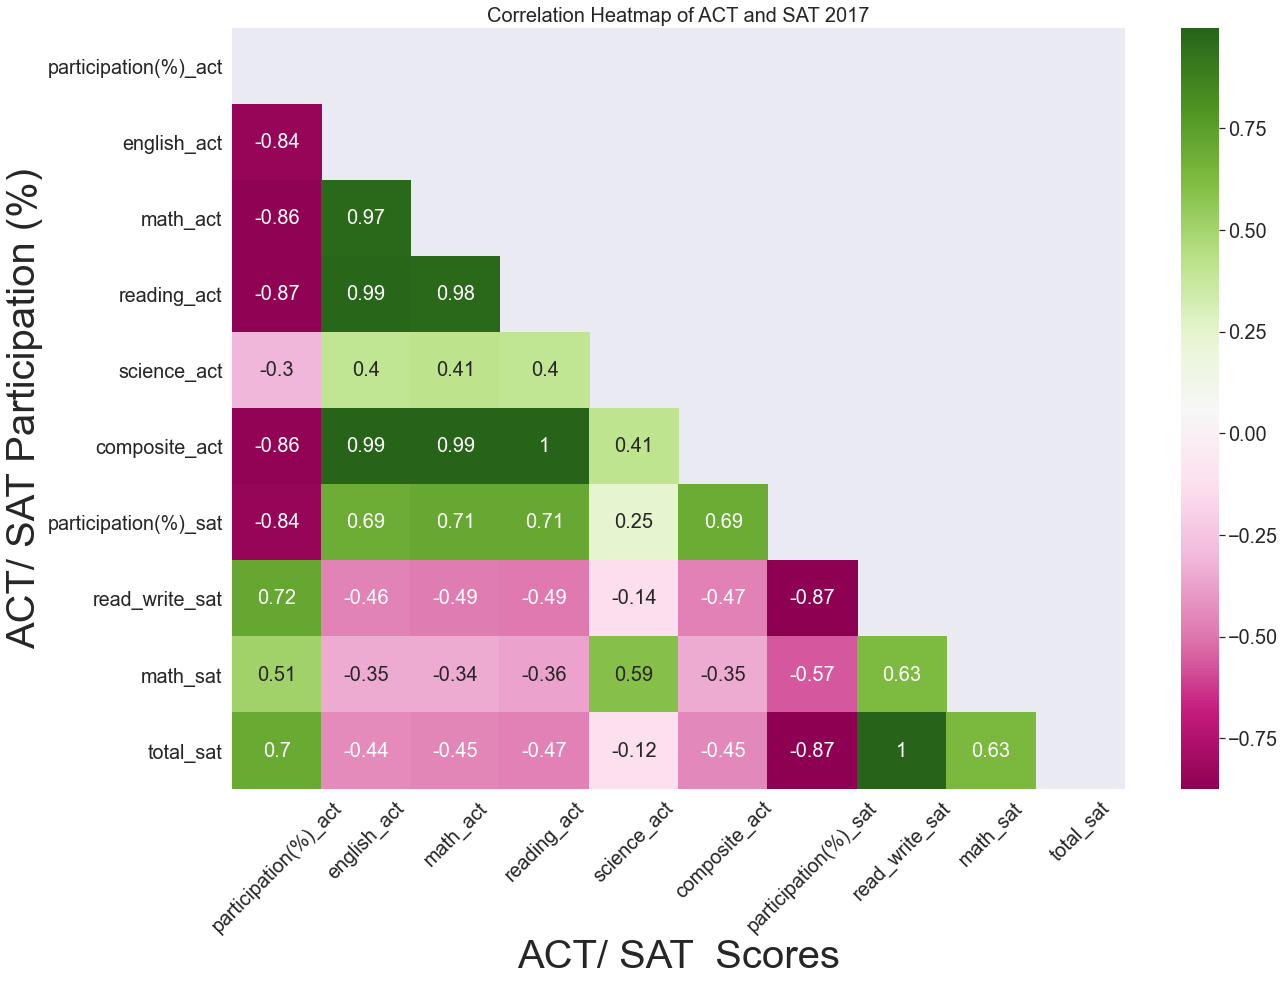

In [353]:
#Establish size of figure.
plt.figure(figsize=(20,14));
mask = np.zeros_like(act_sat_2017.corr());
mask[np.triu_indices_from(mask)] = True; # hide the upper triangle of the graph
sns.set(font_scale=1.8)
mapsat_act=sns.heatmap(act_sat_2017.corr(), annot=True, mask=mask, annot_kws={'size': 20}, cmap="PiYG", xticklabels=True);
mapsat_act.set_xticklabels(mapsat_act.get_xticklabels(), rotation=45);


plt.title('Correlation Heatmap of ACT and SAT 2017', size = 20)
plt.xlabel('ACT/ SAT  Scores', fontsize = 40)
plt.ylabel('ACT/ SAT Participation (%)', fontsize = 40);


Observation: The result shows negative correlation between participation rate and test results in both exam types on 2017. The higher the participation rate resulted lower the test score of all subjects. 

2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.


In [354]:
def histograms(dataframe, columns_name, titles, xlabel):
    nrows = int(np.ceil(len(columns_name)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12))
    ax = ax.ravel() 
    for i, column in enumerate(columns_name): # to provide index for columns and iterate them      
        ax[i].hist(dataframe[column], bins=10)
        ax[i].set_title(titles[i])
        ax[i].set_ylabel('States frequency')
        ax[i].set_xlabel(xlabel)
        ax[i].axvline(np.mean(dataframe[column]), color='k', linestyle='--', lw=4)
        

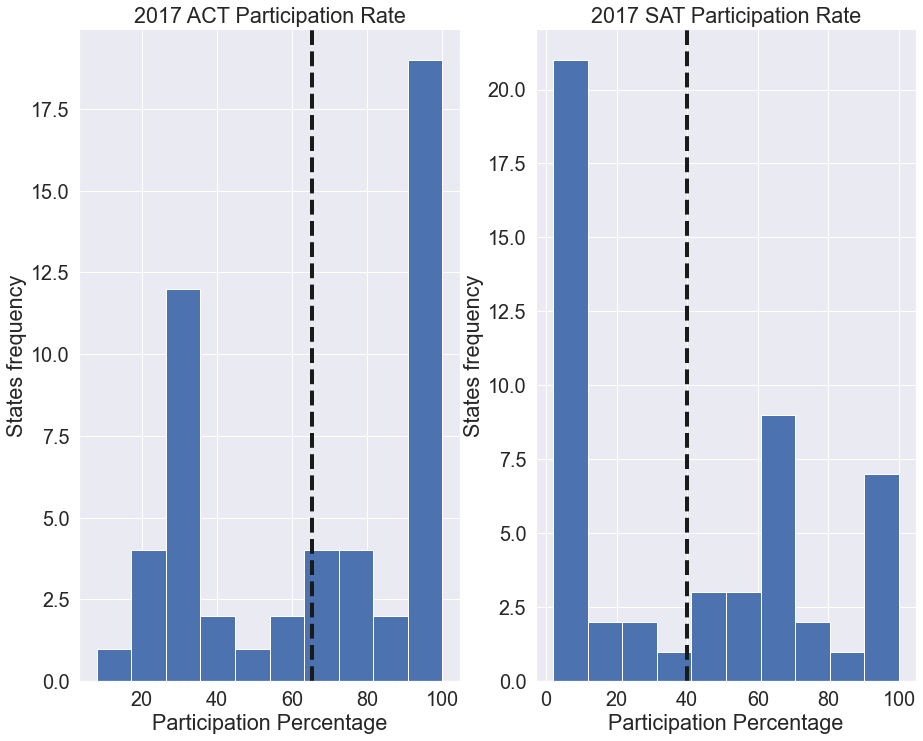

In [355]:
# participation rate
columns_name = ["participation(%)_act" , "participation(%)_sat"]
titles = ["2017 ACT Participation Rate" , "2017 SAT Participation Rate"]
xlabel = "Participation Percentage"
histograms(act_sat_2017, columns_name, titles, xlabel)

Explanation: The participation rate of about 20 states are within 90 to 100%. On the contrary the states' participation rates on SAT 20117 test  are densed within 0 to 10%

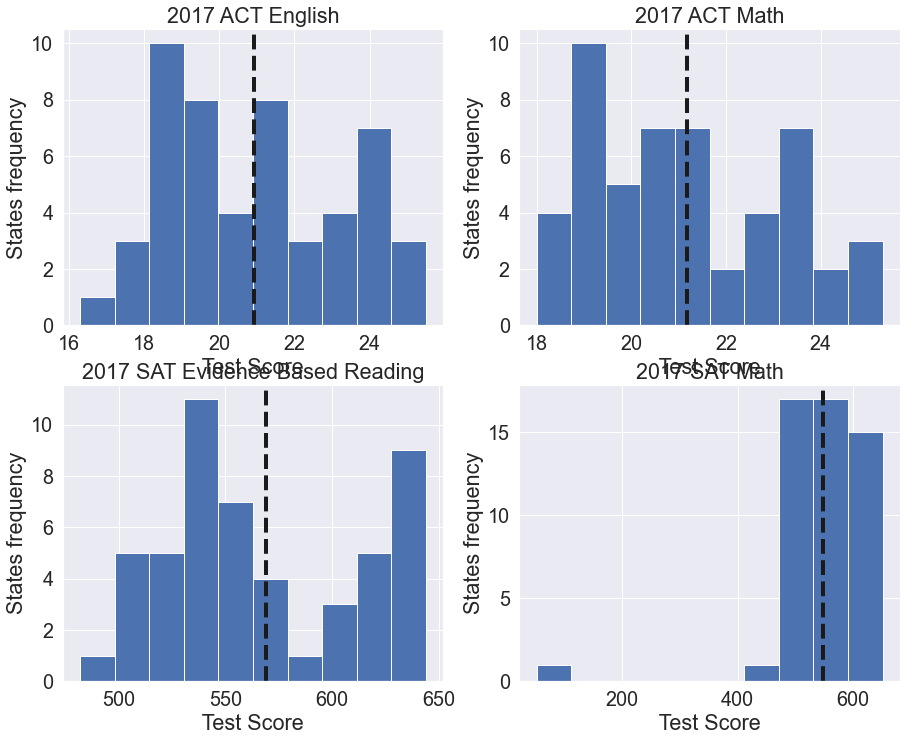

In [356]:
# math and english
columns_name = ['english_act', 'math_act','read_write_sat', 'math_sat']
titles = ["2017 ACT English" , "2017 ACT Math" ,"2017 SAT Evidence Based Reading","2017 SAT Math"]
xlabel = " Test Score "
histograms(act_sat_2017, columns_name, titles, xlabel)

Analysis: The majority of evidence based reading and writing score are lower than the mean.  The math test score of SAT 2017 highly skewed to the right which is not normally distributed

3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels

In [357]:
def plot_box(dataframe, columns_name ,titles, ylabel):
    plt.figure(figsize=(14,10))
    sns.set(style="whitegrid")
    plt.title(titles)
    plt.ylabel(ylabel)
    ax = sns.boxplot(data=dataframe[columns_name], width=0.4)

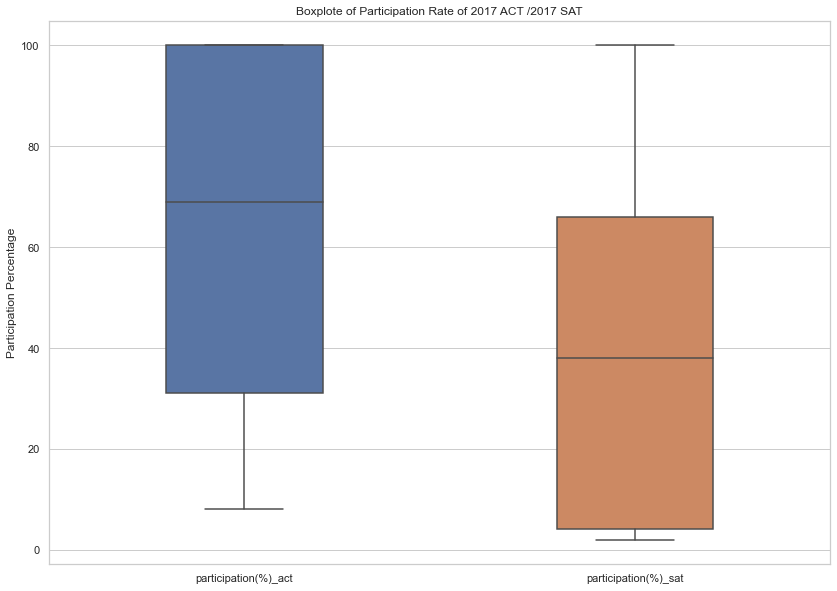

In [358]:
# Participation rate
columns_name = ["participation(%)_act" , "participation(%)_sat"]
titles = "Boxplote of Participation Rate of 2017 ACT /2017 SAT"
ylabel = "Participation Percentage"
plot_box(act_sat_2017, columns_name, titles, ylabel)

Explanation of the analysis: In ACT participation there is a lower extrem value whereas on SAT participation there is a higher extrime value away from the median.

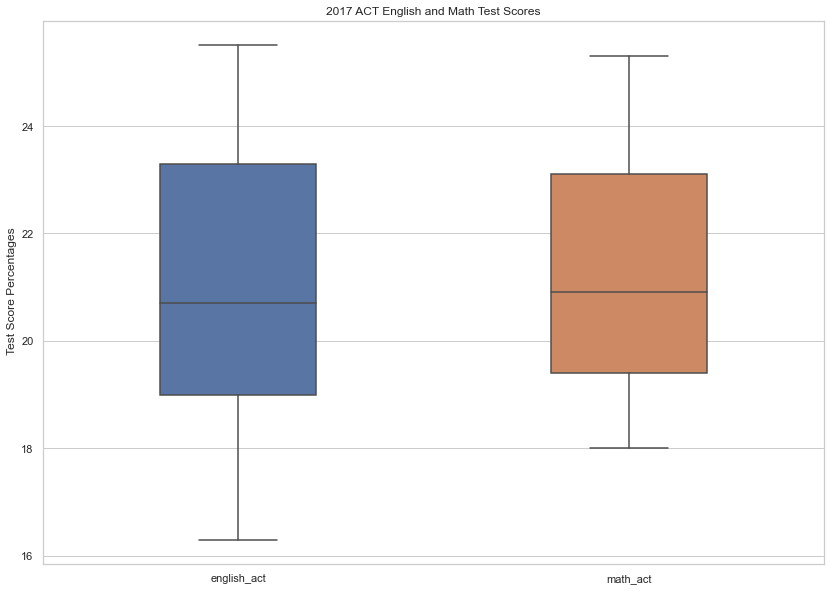

In [359]:
# ACT
columns_name = ['english_act', 'math_act']
titles = "2017 ACT English and Math Test Scores"
ylabel = " Test Score Percentages"
plot_box(act_sat_2017, columns_name, titles, ylabel)

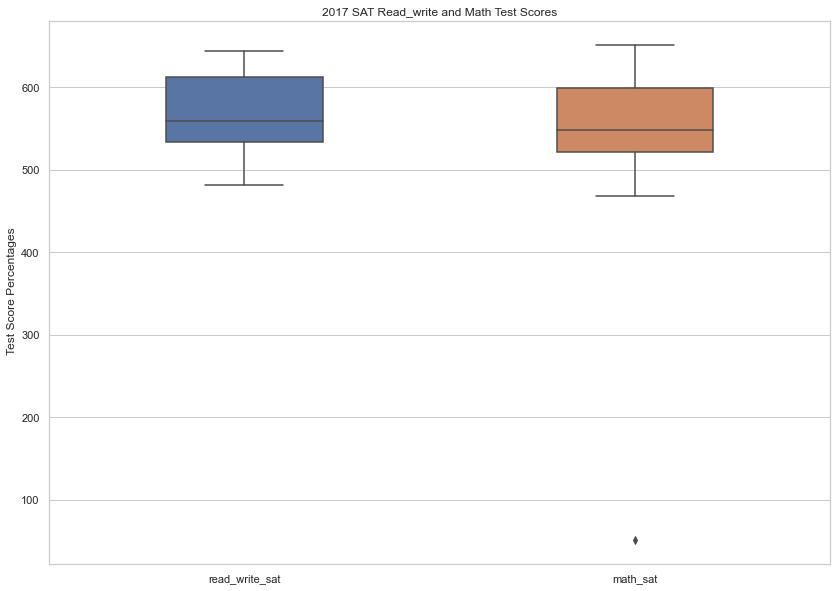

In [360]:
# SAT
columns_name = ['read_write_sat', 'math_sat']
titles = "2017 SAT Read_write and Math Test Scores"
ylabel = " Test Score Percentages"
plot_box(act_sat_2017, columns_name, titles, ylabel)


4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable


In [361]:
def plot_scatter(dataframe, x, y, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(dataframe[x], dataframe[y])
    plt.title(title)
    plt.ylabel(y, fontsize = 20)
    plt.xlabel(x, fontsize = 20);
    #plt.show()
    

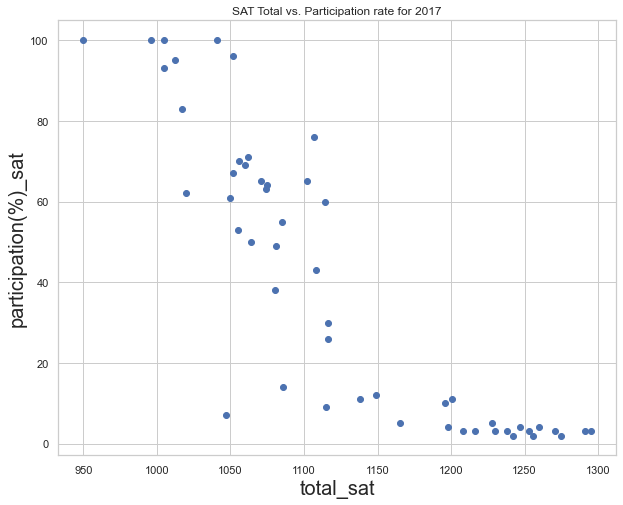

In [362]:
#SAT 
plot_scatter(act_sat_2017, 'total_sat', 'participation(%)_sat', 'SAT Total vs. Participation rate for 2017')


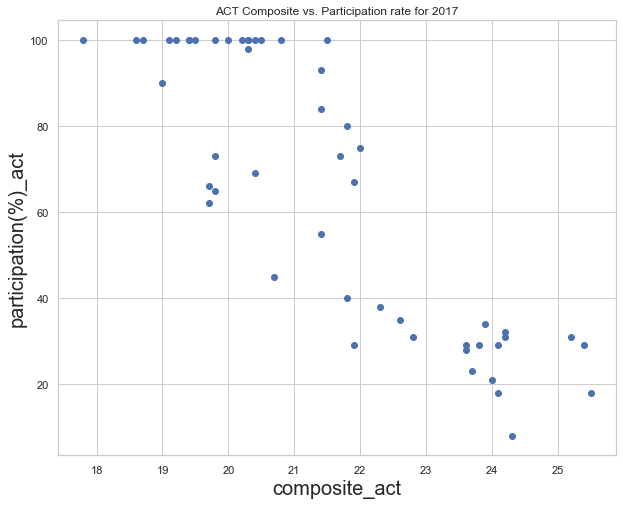

In [363]:
#ACT
plot_scatter(act_sat_2017, 'composite_act', 'participation(%)_act', 'ACT Composite vs. Participation rate for 2017')

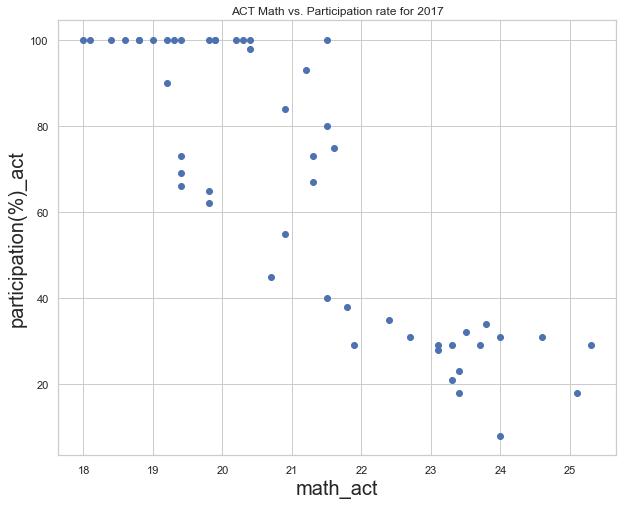

In [364]:
#ACT-Maths
plot_scatter(act_sat_2017, 'math_act', 'participation(%)_act', 'ACT Math vs. Participation rate for 2017')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

There is interest in the academic institution to use SAT or ACT test as reference standard for the admission (1). However, states have different preferred requirement either SAT or CAT participation for college admission (1-2). The results confirmed each tests has independent of each other’s to estimate the participation of the student for the college or university admissions. The analysis showed more states (17) have 100% participation rate of ACT as compared with states for SAT (4 states). This indicates ACT has more preferred than SAT. Further, there were four states had above 50% participation in SAT and ACT. From these results it may be better to use both tests as tools to all states instead one. 